<a href="https://colab.research.google.com/github/Michael-Jimenez-C/Investigaci-n-de-operaciones/blob/main/Tarea5IO/PD_deterministica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [4]:
G=nx.DiGraph()

aristas=[[(1,2,8),(1,3,7),(1,4,8)],
         
         [(2,5,9),(2,6,10),
         (3,5,5),(3,6,7),(3,7,5),(3,8,6),
         (4,7,8),(4,8,14)],
         
         [(5,9,8),(5,10,6),
         (6,9,4),(6,10,3),
         (7,9,11),(7,10,8),(7,11,7),
         (8,10,12),(8,11,6)],
         
         [(9,12,14),
         (10,12,6),
         (11,12,15)]]
nodos=[[1],[2,3,4],[5,6,7,8],[9,10,11],[12]]
for i in aristas:
  for j in i:
    G.add_edge(j[0],j[1],weight=j[2])

def calcularpos(nodos,espacio):
  pos={}
  for i in range(len(nodos)):
    for j in range(len(nodos[i])):
      pos[nodos[i][j]]=(i*espacio,(-j+(len(nodos[i])-1)/2))
  return pos

In [5]:
options = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 4
}
espacio=5
pos=calcularpos(nodos,espacio)

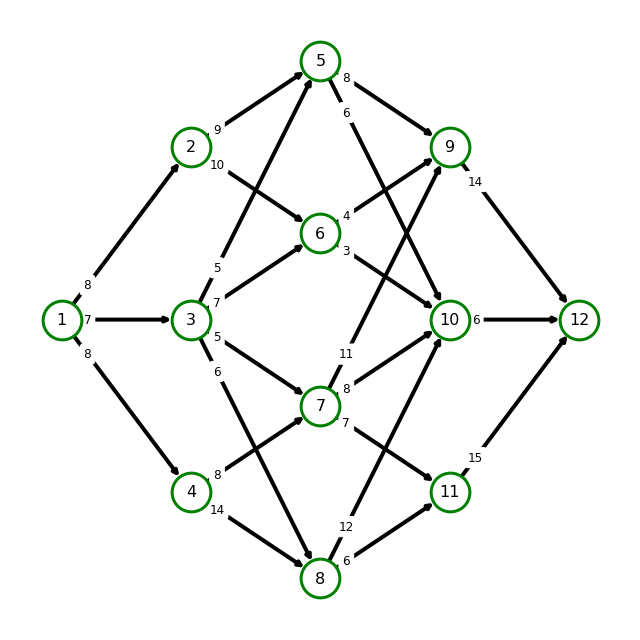

In [6]:
def graficar(G,nodos,options,pos):
  plt.figure(figsize=(9,9))
  nx.draw_networkx(G, pos,**options)
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=.8,rotate=False,font_size=12)
  ax = plt.gca()
  plt.axis("off")
  plt.tight_layout()
  plt.savefig("Grafo.pdf",dpi=500)

graficar(G,nodos,options,pos)
plt.show()

In [7]:
def hallar(origen,destino,aristas,i=-1,r={},min=True):
  if len(aristas)+i<0:
    return r
  for j in aristas[i]:
    if(j[1]==destino):
      r[j[0]]=(j[1],j[2])
    else:
      if not (j[0] in r):
        r[j[0]]=(None,np.infty if min else -np.infty)
      else:
        if (j[2]+r[j[1]][1])<r[j[0]][1] and min:
          r[j[0]]=(j[1],j[2]+r[j[1]][1])
        elif (j[2]+r[j[1]][1])>r[j[0]][1] and not min:
          r[j[0]]=(j[1],j[2]+r[j[1]][1])
  return hallar(origen,destino,aristas,i-1,r,min)

In [8]:
def caminoA(aristas,origen,destino,min=True):
  r=hallar(origen,destino,aristas,min=min)
        
  camino=[origen]
  while camino[-1]!=destino:
    camino.append(r[camino[-1]][0])
  return camino,r[camino[0]][1]

In [9]:
sol=caminoA(aristas,1,12)
print(sol)

([1, 3, 6, 10, 12], 23)


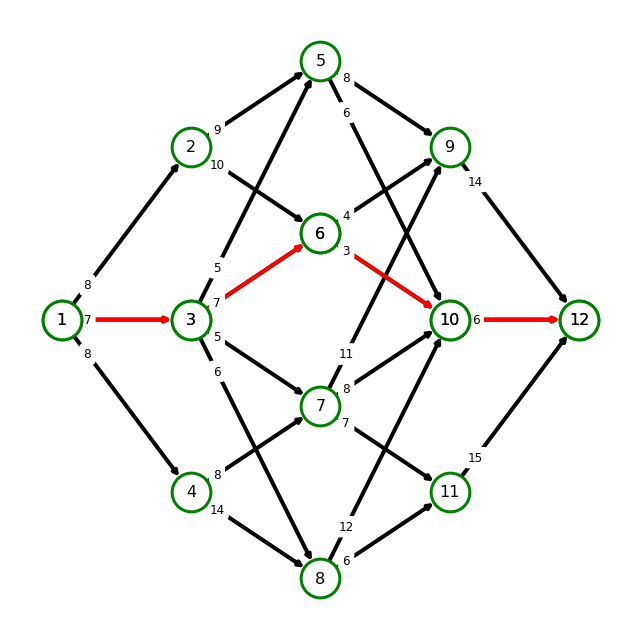

In [10]:
def  graficarCamino(G,sol,options,pos):
  Gs=G.subgraph(sol)

  plt.figure(figsize=(9,9))

  nx.draw_networkx(G, pos,**options)
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels,label_pos=.8,rotate=False,font_size= 12)

  nx.draw_networkx(Gs, pos,**options,edge_color="red")
  nx.draw_networkx_edge_labels(Gs, pos, edge_labels,label_pos=.8,rotate=False,font_size= 12)
  ax = plt.gca()
  plt.axis("off")
  plt.tight_layout()
  plt.savefig("Grafosolucion.pdf",dpi=500)
  plt.show()

graficarCamino(G,sol[0],options,pos)

#Asignacion

In [11]:
tabla=[[40,24,32],
       [54,47,46],
       [78,63,70],
       [99,78,84]]

G=nx.DiGraph()

In [12]:
def asign(tabla):
  cmax=len(tabla)
  destinos=len(tabla[0])
  tabla=[[0 for i in range(destinos)]]+tabla
  nodos=[[str(cmax)]]+[[str(i)+'L'+str(j) for i in range(cmax+1)] for j in range(destinos-1)]+[['0F']]
  aristas=[]
  for i in range(len(nodos)-1):
    aristas.append([])
    for j in range(len(nodos[i])):
      l=(nodos[i+1] if i==0 or i==len(nodos)-2 else nodos[i+1][:j+1])
      s=int(nodos[i][j][0])
      aristas[-1]+=[(nodos[i][j],w[0],w[1]) for w in [(p,tabla[s-int(p[0])][i]) for p in l]]
  return nodos,aristas



In [ ]:
nodos,aristas=asign(tabla)

for i in aristas:
  for j in i:
    G.add_edge(j[0],j[1],weight=j[2])

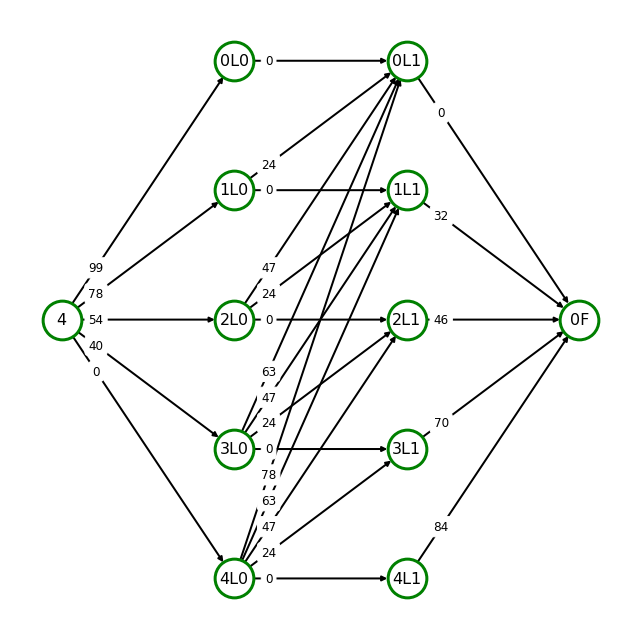

In [13]:
pos=calcularpos(nodos,espacio)
options = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 2
}
graficar(G,nodos,options,pos)

In [14]:
sol=caminoA(aristas,'4','0F',min=False)
print(sol)

(['4', '3L0', '1L1', '0F'], 119)


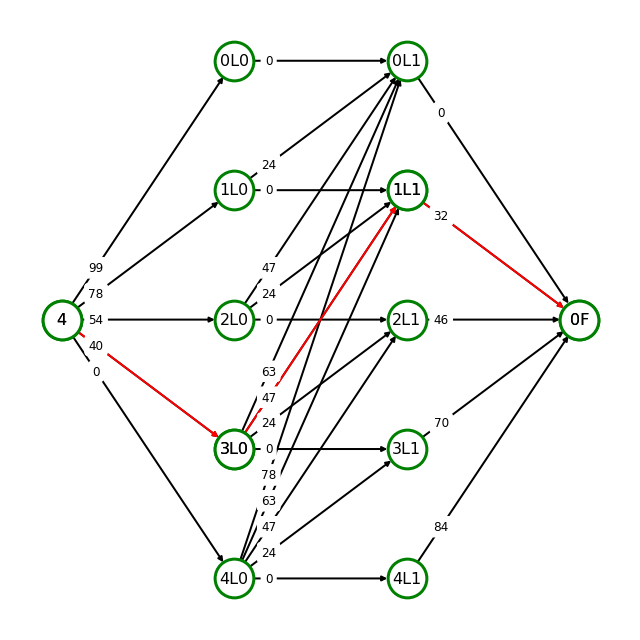

In [15]:
graficarCamino(G,sol[0],options,pos)

#Punto 3

In [13]:
tabla=[[4,6,5,3],
       [7,8,9,7],
       [9,10,11,12],
       [12,11,10,14],
       [15,12,9,16]]

G=nx.DiGraph()
def asign(tabla):
  cmax=len(tabla)
  destinos=len(tabla[0])
  tabla=[[0 for i in range(destinos)]]+tabla
  nodos=[[str(cmax)]]+[[str(i)+'L'+str(j) for i in range(cmax+1)] for j in range(destinos-1)]+[['0F']]
  aristas=[]
  for i in range(len(nodos)-1):
    aristas.append([])
    for j in range(len(nodos[i])):
      l=(nodos[i+1] if i==0 or i==len(nodos)-2 else nodos[i+1][:j+1])
      s=int(nodos[i][j][0])
      aristas[-1]+=[(nodos[i][j],w[0],w[1]) for w in [(p,tabla[s-int(p[0])][i]) for p in l]]
  return nodos,aristas

nodos,aristas=asign(tabla)

for i in aristas:
  for j in i:
    G.add_edge(j[0],j[1],weight=j[2])

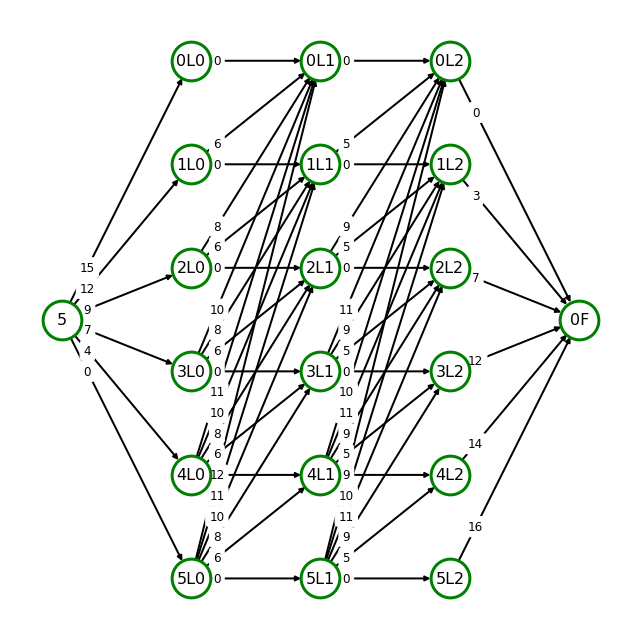

In [16]:
pos=calcularpos(nodos,5)
options = {
    "font_size": 16,
    "node_size": 1500,
    "node_color": "white",
    "edgecolors": "green",
    "linewidths": 3,
    "width": 2
}
graficar(G,nodos,options,pos)

In [15]:
sol=caminoA(aristas,'5','0F',min=False)
print(sol)

(['5', '5L0', '4L1', '3L2', '0F'], 23)


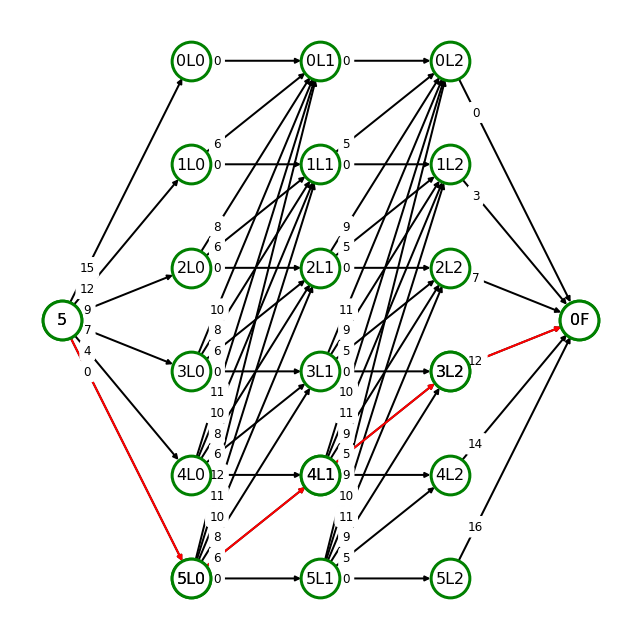

In [17]:
graficarCamino(G,sol[0],options,pos)